# Volume Dataset Analysis

In this exercise you will be analyzing a DICOM dataset. This dataset is not as conveniently organized on the filesystem as some of the datasets we have seen in this lesson so far. Rather, this dataset looks like something that you are likely to get as a raw dump from a clinical data archive.  

Your task is to use the skills you have acquired in this lesson to go through this dataset and answer (or provide your best quess to) the following questions:

1. What imaging modality was used to produce this dataset?
2. Data from how many patients does the dataset include?
3. How many studies are in the dataset?
4. What are the oldest and the most recent studies in the dataset?
5. How many series are in the dataset?

In addition, do the following tasks:

6. List voxel dimensions of all 3D volumes (i.e. series) that the dataset contains as WxHxD
7. The dataset contains two outliers. Can you find them? There is more than one way to find them. Type up why do you think these volumes are outliers and what approach you used.

Lastly, I understand that you are not a radiologist quite yet, but as a *stretch goal*, do the following: 

* Load a few series into 3D slicer and tell what is the anatomy imaged in our dataset

You can assume that this dataset is consistent with DICOM information model, i.e. all instances within series share common attributes of the series and all instances within study share common study attributes. In other words, you can expect that something like Series Description will be the same for all instances belonging to the same series and you can read this value from any one file of the series. You can also expect that all the slices in same series have equal resolution and are evenly spaced.

---

## Solution

In [82]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

In [5]:
# Let's use the same code as in the walkthrough to load data

path = r"data"
dirs = np.array([[(os.path.join(dp, f), pydicom.dcmread(os.path.join(dp, f), stop_before_pixels = True)) for f in files]
                   for dp,_,files in os.walk(path) if len(files) != 0])

In [8]:
# How many directories?

len(dirs)

1

That's to be expected - we could've seen this from looking at file system. So, everything is lumped into one directory

In [9]:
instances = dirs[0]
len(instances)

864

We have 864 instances. Now let's calculate series:

In [18]:
series_uids = np.unique([inst[1].SeriesInstanceUID for inst in instances])
len(series_uids)

32

We have 32 series - that is our **answer to Question 5**  

Now let's calculate studies:

In [19]:
studies_uids = np.unique([inst[1].StudyInstanceUID for inst in instances])
len(studies_uids)

10

We have 10 studies - that is our **answer to Question 3**  

How many patients? Let's print out all patientID tags to see if we could rely on these.

In [34]:
patient_ids = [inst[1].PatientID for inst in instances]
print(patient_ids)

['123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456', '123456',

Looks like PatientID is set for all instances and it's different. Without having more data about how these images were collected we can most likely rely on Patient ID in distinguishing between different patients.

In [38]:
patients_ids_uq = np.unique(patient_ids)
print(f"Number of patients: {len(patients_ids_uq)}, patient IDs: {patients_ids_uq}")

Number of patients: 6, patient IDs: ['123456' 'OPA135179' 'PGBM-003' 'PGBM-004' 'PGBM-005' 'PGBM-009']


We have our **answer to Question 2** - there are 6 patients  

Note that by looking at these patient IDs we see something odd in naming patterns. But let's pin that thought for now.

Let's see what imaging modalities do we have?

In [42]:
# Create hash of all modalities for individual series

series_uids_modality_map = {uid: s[1].Modality for uid in series_uids for s in instances if s[1].SeriesInstanceUID == uid }

In [41]:
series_uids_modality_map

{'1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286': 'CT',
 '1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.108708982094690934070899838243': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.111299569371716382165219422799': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.131971402732874033229609248302': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.137802635701410656176169562528': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.148342356080268980546237840587': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.158869091666854803918782490935': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.165843183220097757648432257390': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.167613564536106399232524912048': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906': 'MR',
 '1.3.6.1.4.1.14519.5.2.1.4429.

Interesting. So most of the data is MR and one series is CT. Let's visualize a few slices from that CT and a few random MR series:

In [94]:
# First, load the pixel data - remember that we didn't load it for the sake of speed

slices_ct = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == "1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286"]

slices_mr1 = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[4][0]]

slices_mr2 = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].SeriesInstanceUID == list(series_uids_modality_map.items())[9][0]]

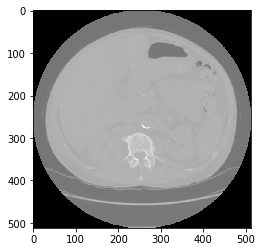

In [93]:
plt.imshow(slices_ct[10].pixel_array, cmap="gray")

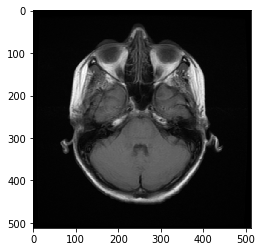

In [95]:
plt.imshow(slices_mr1[10].pixel_array, cmap="gray")

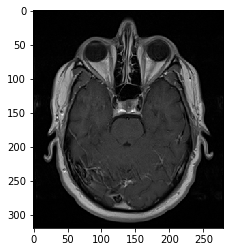

In [96]:
plt.imshow(slices_mr2[10].pixel_array, cmap="gray")

Ok, so clearly that CT is a different antomy than those MRs. In fact, this is a CT of the abdomen while the few MRs are MRs of the brain. It should be safe to call that CT an outlier and get rid of it. We have found one outlier and have a partial **answer to our Task #7**

We also have an **answer to our Question 1** - the images were produced by MRI modality except for one outlier which is a CT.

Now, let's try to find the answer to Question 4:

In [99]:
study_dates = sorted(np.unique([inst[1].StudyDate for inst in instances]))
study_dates

['19880512',
 '19910103',
 '19910702',
 '19920505',
 '19930622',
 '19940112',
 '19950329',
 '19951017',
 '20150116',
 '20190101']

So, we have our **answer to Question 4**: the oldest study is 1988 and the most recent one is 1995. 


But we also see something interesting - two studies are much more recent than the rest. Let's take a closer look. I suspect that one of them would be our outlier CT study. Let's check this:

In [100]:
print(np.unique([inst[1].StudyDate for inst in instances if inst[1].Modality == "CT"]))

['20190101']


Indeed! What is the other one then? Let's visualize the image:

In [101]:
slices_odd_mr = [pydicom.dcmread(inst[0]) for inst in instances \
             if inst[1].StudyDate == "20150116"]

In [103]:
# Let's check how many series we have in this study:

print(np.unique([s.SeriesInstanceUID for s in slices_odd_mr]))
print(len(slices_odd_mr))

['1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0']
36


So, it's all one volume. Now, let's plot:

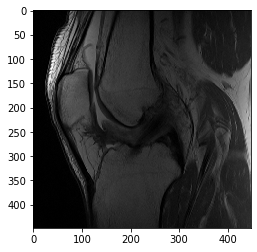

In [133]:
plt.imshow(slices_odd_mr[15].pixel_array, cmap="gray")

Well, you might not know what that is, but that is clearly not a brain image. In fact, if you stick with this course till the end - you will learn exactly what that is in the last exercise of the last lesson :)

We have found another outlier and have the final piece of the **answer to our Task #7**  

Finally, let's print out the sizes of our volumes (along with some extra data)!

In [135]:
volumes = dict()

for inst in instances:
    sid = inst[1].SeriesInstanceUID
    if (sid not in volumes):
        volumes[sid] = dict()
        
    volumes[sid]["StudyDate"] = inst[1].StudyDate
    volumes[sid]["Width"] = inst[1].Columns
    volumes[sid]["Height"] = inst[1].Rows
    volumes[sid]["PatientId"] = inst[1].PatientID
    
    if ("slice_count" not in volumes[sid]):
        volumes[sid]["slice_count"] = 0
    else:
        volumes[sid]["slice_count"] += 1

In [136]:
volumes

{'1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286': {'StudyDate': '20190101',
  'Width': 512,
  'Height': 512,
  'PatientId': '123456',
  'slice_count': 138},
 '1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0': {'StudyDate': '20150116',
  'Width': 448,
  'Height': 448,
  'PatientId': 'OPA135179',
  'slice_count': 35},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.250698293053013179878447218670': {'StudyDate': '19950329',
  'Width': 280,
  'Height': 320,
  'PatientId': 'PGBM-003',
  'slice_count': 21},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.170099978014836890431312652906': {'StudyDate': '19950329',
  'Width': 280,
  'Height': 320,
  'PatientId': 'PGBM-003',
  'slice_count': 21},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.105521800202421035670670758706': {'StudyDate': '19950329',
  'Width': 280,
  'Height': 320,
  'PatientId': 'PGBM-003',
  'slice_count': 21},
 '1.3.6.1.4.1.14519.5.2.1.4429.7055.149455479236394071679725178532': {'StudyDate': '19950329',
  'Width': 280,
  'Height'

In [132]:
# Or, more concisely:
for _,v in volumes.items():
    print(f"{v['Width']}x{v['Height']}x{v['slice_count']}  ")

512x512x138  
448x448x35  
280x320x21  
280x320x21  
280x320x21  
280x320x21  
512x512x23  
512x512x23  
512x512x23  
512x512x23  
512x512x22  
512x512x22  
512x512x22  
512x512x22  
512x512x21  
512x512x21  
512x512x21  
512x512x21  
280x320x21  
280x320x21  
280x320x21  
280x320x21  
260x320x23  
260x320x23  
260x320x23  
260x320x23  
260x320x24  
260x320x24  
260x320x24  
512x512x21  
512x512x21  
512x512x21  


And that is the **solution to our Task #6**

Note that this final check gives you another hint at how you could have found the outliers. Clearly, our CT image has many more slices than other volumes and our odd MR image (which is an MR of the knee) has in-plane resolution that is different from the rest of the volumes in our dataset. Also, the intuition we've got early on was correct - patient IDs for the outliers are different. In fact, different hospitals/research protocols usually use different schemes for generating patient IDs and that is what we are seeing here - images from three different sources.

## Answers

So, to summarize, here are the answers to our questions and solutions to our tasks:

1. What imaging modality was used to produce this dataset?
> Mostly MRI, one CT

2. Data from how many patients does the dataset include?
> 6 patients

3. How many studies are in the dataset?
> 10 studies

4. What are the oldest and the most recent studies in the dataset?
> The oldest study is May 12, 1988, most recent one is Jan 1 2019

5. How many series are in the dataset?
> There are 32 series

6. List voxel dimensions of all 3D volumes (i.e. series) that the dataset contains as WxHxD
> 512x512x138  
448x448x35  
280x320x21  
280x320x21  
280x320x21  
280x320x21  
512x512x23  
512x512x23  
512x512x23  
512x512x23  
512x512x22  
512x512x22  
512x512x22  
512x512x22  
512x512x21  
512x512x21  
512x512x21  
512x512x21  
280x320x21  
280x320x21  
280x320x21  
280x320x21  
260x320x23  
260x320x23  
260x320x23  
260x320x23  
260x320x24  
260x320x24  
260x320x24  
512x512x21  
512x512x21  
512x512x21  

7. The dataset contains two outliers. Can you find them? There is more than one way to find them. Type up why do you think these volumes are outliers and what approach you used.
> We have two series:  
Series UID 1.2.826.0.1.3680043.2.1125.1.45859137663006505718300393375464286: that is a CT series, and a different anatomy  
Series UID 1.3.12.2.1107.5.2.33.37105.2015011616025092819028166.0.0.0: that is very different data range, and looks like different anatomy